<a href="https://colab.research.google.com/github/IzackMercier/HWJW123/blob/master/269497_66_2_Linear_regression_(Pytorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reset -f
import torch
import matplotlib.pyplot as plt

# Linear regression

In this notebook, you will see

1. Solving linear regression using Normal equation
2. Solving linear regression using Gradient descent (Batch/SGD/Minibatch)
3. Using Pytorch's DataLoader and AutoDiff

Given 6 examples with targets as shown in the table.
   
   | Data | (1) | (2)  | (3) | (4) | (5) | (6)  |
   | --- | --- | ---| ---| ---| ---| ---|
  | $x_1$ | 0 | 1 | 2 | 3 | 4 | 5 |
  | $x_2$ | 0 | 2 | 1 | 4 | 4 | 3 |  
  | $y$   | 0 | 1 | 2 | 3 | 5 | 6 |  

Find the linear regression $f(x_1, x_2) = w_1 x_1 + w_2 x_2 + b$

## **Version 1.** Linear regression using Normal equation

Normal equation as derived in class: $\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$.

### Create design matrix & label

In [ ]:
X = torch.tensor([[0., 0.],
                  [1., 2.],
                  [2., 1.],
                  [3., 4.],
                  [4., 4.],
                  [5.,3.]]) # Design matrix
Y = torch.tensor([0.,1.,2.,3.,5.,6.])  # Target
print('X =',X)
print('Y =',Y, '\tY.shape=', Y.shape)

X = tensor([[0., 0.],
        [1., 2.],
        [2., 1.],
        [3., 4.],
        [4., 4.],
        [5., 3.]])
Y = tensor([0., 1., 2., 3., 5., 6.]) 	Y.shape= torch.Size([6])


In [ ]:
Y = Y[:,None]   # reshape to make it 2D
print('Y =',Y, '\tY.shape=', Y.shape)

Y = tensor([[0.],
        [1.],
        [2.],
        [3.],
        [5.],
        [6.]]) 	Y.shape= torch.Size([6, 1])


### Augmentation

Don't forget that our formulation of Linear regression has $b$ inside vector of $\mathbf{w}$

In [ ]:
m, n = X.shape
X = torch.cat( (X,torch.ones((m,1))  ), axis=1)
print(X)

tensor([[0., 0., 1.],
        [1., 2., 1.],
        [2., 1., 1.],
        [3., 4., 1.],
        [4., 4., 1.],
        [5., 3., 1.]])


### Applying the Normal equation

In [ ]:
w = torch.linalg.inv(X.T @ X) @ X.T @ Y
print('w =', w)
print(f'Solution is f(x_1, x_2) = {w[0,0]:.3f} x_1 + {w[1,0]:.3f} x_2 + {w[2,0]:.3f}')

w = tensor([[ 1.2836],
        [-0.0802],
        [-0.1884]])
Solution is f(x_1, x_2) = 1.284 x_1 + -0.080 x_2 + -0.188


### Visualizing the plane (optional)

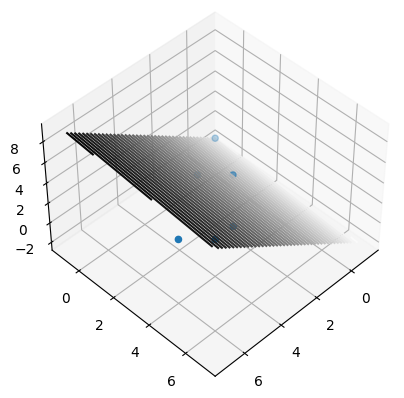

In [ ]:
def linear_function(x1, x2):
    return 1.284*x1 - 0.080*x2 -0.188

x1_values = torch.linspace(-1,7,100)  # create a grid
x2_values = torch.linspace(-1,7,100)
X1_values, X2_values = torch.meshgrid(x1_values, x2_values, indexing='ij')

Y_values = linear_function(X1_values, X2_values)
plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1_values, X2_values, Y_values, 50, cmap='binary')
ax.view_init(45, 45)
ax.scatter3D(X[:,0], X[:,1], X[:,2])
plt.show()

## **Version 2.** Linear regression using Gradient descent

## Create design matrix & label

We will use the same augmented Design matrix $\mathbf{X}$ and its label $\mathbf{y}$.

### **Version 2.1** Batch gradient descent

Note: the code below shows batch gradient descent without any randomization. So, practically, it is not good.

Solution is f(x_1, x_2) = 1.284 x_1 + -0.080 x_2 + -0.188


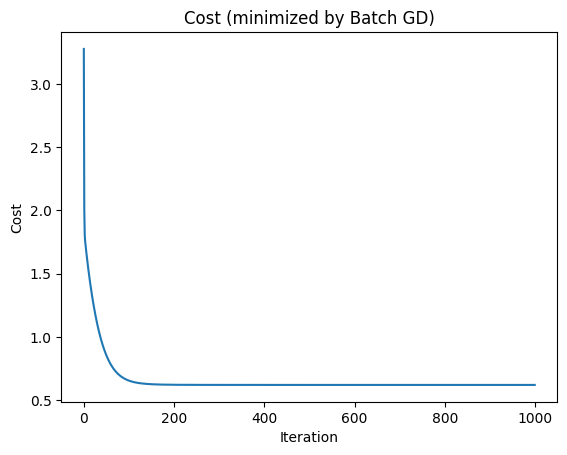

In [ ]:
cost = []
alpha = 0.02 # Learning rate
w = torch.zeros((3,1))
for t in range(1000):
    dw = (1/3)*(w.T @ X.T @ X - Y.T @ X)   # dJ/dw
    w = w - alpha*dw.T
    cost.append( torch.linalg.norm(Y - X @ w)   )

print(f'Solution is f(x_1, x_2) = {w[0,0]:.3f} x_1 + {w[1,0]:.3f} x_2 + {w[2,0]:.3f}')

plt.figure()
plt.plot(range(0,len(cost)),cost)
plt.title('Cost (minimized by Batch GD)')
plt.xlabel('Iteration')
plt.ylabel('Cost');

### **Version 2.2** Stochastic gradient descent (SGD)

Solution is f(x_1, x_2) = 1.274 x_1 + -0.088 x_2 + -0.179


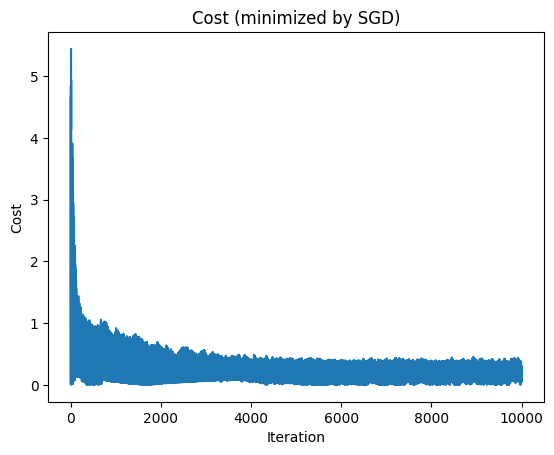

In [ ]:
cost = []
alpha = 0.001 # Learning rate
w = torch.zeros((3,1))
torch.manual_seed(123)
for t in range(10000):

  idx = torch.randint(0,len(X),(1,))
  x = X[idx].reshape(1,-1) # I picked only example
  y = Y[idx].reshape(1,-1)

  dw = w.T @ x.T @ x - y.T @ x   # dJ/dw
  w = w - alpha*dw.T
  cost.append( torch.linalg.norm(y - x @ w)   )


print(f'Solution is f(x_1, x_2) = {w[0,0]:.3f} x_1 + {w[1,0]:.3f} x_2 + {w[2,0]:.3f}')

plt.figure()
plt.plot(range(0,len(cost)),cost)
plt.title('Cost (minimized by SGD)')
plt.xlabel('Iteration')
plt.ylabel('Cost');

### **Version 2.3** Minibatch gradient descent

Pseudo code:

```python
for epoch in range(10000): # Model sees all examples in the training dataset
    Generate a list of minibatchs (shuffle data)
    for minibatch in Minibatchs:
      compute gradient from minibatch
      use gradient to update the model
```

We will use Pytorch to do
1. create minibatch
2. compute gradients


In [ ]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

# Create dataset
X = torch.tensor([[0., 0.],[1., 2.],[2., 1.],[3., 4.],[4.,4.],[5.,3.]]) # Design matrix
Y = torch.tensor([0.,1.,2.,3.,5.,6.]).unsqueeze(1)  # Target
print(Y)

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [5.],
        [6.]])


In [ ]:
ds = TensorDataset(X,Y)
ds[1]

(tensor([1., 2.]), tensor([1.]))

In [ ]:
ds_loader = DataLoader(ds, batch_size=6,shuffle=False)
for data in ds_loader:
  print(data)

[tensor([[0., 0.],
        [1., 2.],
        [2., 1.],
        [3., 4.],
        [4., 4.],
        [5., 3.]]), tensor([[0.],
        [1.],
        [2.],
        [3.],
        [5.],
        [6.]])]


In [ ]:
next(iter(ds_loader))

[tensor([[0., 0.],
         [1., 2.]]), tensor([[0.],
         [1.]])]

w1 = 1.2835811376571655 w2 = -0.08022470772266388 b =  -0.18842709064483643


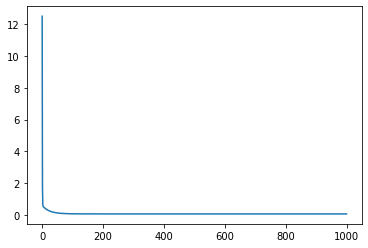

In [ ]:
learning_rate = 0.02

w = torch.zeros((2,1), requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

losses = []

for epoch in range(1000):
  for Xb, yb in ds_loader:
    yhatb = Xb @ w + b
    loss = (yhatb - yb).pow(2).mean()
    loss.backward()   # w.grad, b.grad

    with torch.no_grad(): # i.e. requires_grad will be disabled.
      w -= learning_rate*w.grad
      b -= learning_rate*b.grad

      #*****
      w.grad.zero_()  # ใน pytorch เครื่องหมาย _ = inplace operator
      b.grad.zero_()


      losses.append(loss.numpy())


print('w1 =', w[0,0].item(), 'w2 =', w[1,0].item(), 'b = ', b.item())

plt.plot(losses);